In [1]:
from google.colab import drive
drive.mount('/content/drive')
root = "/content/drive/My Drive/Colab Notebooks/Hotdog or Not Hotdog/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop 
from keras.losses import binary_crossentropy
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from keras import backend as K
from matplotlib import pyplot as plt
import numpy as np
from os import listdir
import tensorflow as tf
%matplotlib inline

In [0]:
#keras metric
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#custom for comparing prediciton
def f1(y_true, y_pred):
  total_positives = np.sum(y_pred)
  actual_positives = np.sum(y_true)
  true_positives = np.sum(y_true.reshape(y_pred.shape)*y_pred)
  precision = true_positives/(total_positives+K.epsilon())
  recall = true_positives/(actual_positives+K.epsilon())
  f1_score = (2*precision*recall)/(precision + recall + K.epsilon())
  return f1_score

In [12]:
datagen = ImageDataGenerator()
train_gen = datagen.flow_from_directory(
    root+'train data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)
val_gen = datagen.flow_from_directory(
    root+'val data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)
test_gen = datagen.flow_from_directory(
    root+'test data/',
    target_size=(256,256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=64)

Found 5070 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [0]:
def model1_1(inshape=(256,256,3), l2=0.0001, dc=0.2):
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), 
                     activation='relu', 
                     padding="same", 
                     input_shape=inshape, 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(32, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(Dense(512, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

def model1_2(inshape=(256,256,3), l2=0.0003, dc=0.22):
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), 
                     activation='relu', 
                     padding="same", 
                     input_shape=inshape, 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(32, (3,3),
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(Dense(512, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dropout(dc))
    model.add(Dense(1, activation='sigmoid'))
    
    return model
 
def model2_1(inshape=(256,256,3), l2=0.001):
    model = Sequential()
  
    model.add(Conv2D(32, (3,3), 
                     activation='relu', 
                     padding="same", 
                     input_shape=(256, 256, 3)))
    model.add(Conv2D(32, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(64, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(64, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(512, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(512, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dense(1024, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

def model2_2(inshape=(256,256,3), l2=0.003):
    model = Sequential()
  
    model.add(Conv2D(32, (3,3), 
                     activation='relu', 
                     padding="same", 
                     input_shape=(256, 256, 3)))
    model.add(Conv2D(32, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(64, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(64, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(128, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(256, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(512, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(Conv2D(512, (3,3), 
                     activation='relu', 
                     padding="same", 
                     kernel_regularizer=regularizers.l2(l2)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dense(1024, activation='relu', 
                    kernel_regularizer=regularizers.l2(l2)))
    model.add(Dense(1, activation='sigmoid'))
    
    return model
 
def model_type3():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

def model_type3_2():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l1(0.001),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1(0.001),
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1(0.001),
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1(0.001),
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1(0.001),
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

def model_type3_3():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l2(0.009),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l2(0.009),
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l2(0.009),
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l2(0.009),
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l2(0.009),
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

def model_type3_4():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv1_1'))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv1_2'))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv2_1'))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv2_2"))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv3_1"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_2"))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_3"))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv4_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_3"))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_1"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_2"))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_3"))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc1"))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc2"))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

def model_type3_5():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv1_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv1_2'))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name='conv2_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv2_2"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv3_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv3_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv4_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   padding="same",
                   name="conv4_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
#                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                   name="conv5_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
#                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc1"))
  model.add(Dropout(0.25))
  model.add(Dense(256, 
                  activation='relu',
#                   kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                  name="fc2"))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

def model_type3_6():
  model = Sequential()
  
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same", 
                   input_shape=(256, 256, 3),
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv1_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(8, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv1_2'))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name='pool1'))
  
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name='conv2_1'))
  model.add(Dropout(0.05))
  model.add(Conv2D(16, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv2_2"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool2"))
  
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv3_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv3_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(32, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv3_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool3"))
  
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv4_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv4_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   padding="same",
                   name="conv4_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool4"))
             
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv5_1"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv5_2"))
  model.add(Dropout(0.05))
  model.add(Conv2D(64, (3,3), 
                   activation='relu', 
                   padding="same",
                   kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                   name="conv5_3"))
  model.add(Dropout(0.05))
  model.add(MaxPooling2D((2,2), name="pool5"))
    
  model.add(Flatten())
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                  name="fc1"))
  model.add(Dropout(0.25))
  model.add(Dense(256, 
                  activation='relu',
                  kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.003),
                  name="fc2"))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [0]:
model1_v1 = model1_1()
model1_v1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy', f1_score])
model1_v2 = model1_2()
model1_v2.compile(optimizer=Adam(lr=0.0001, 
                              beta_1=0.9, 
                              beta_2=0.999,
                              decay=0.01), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model2_v1 = model2_1()
model2_v1.compile(optimizer=SGD(lr=0.0001,
                             momentum=0.01,
                             decay=1e-9), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model2_v2 = model2_2()
model2_v2.compile(optimizer=SGD(lr=0.0003,
                             momentum=0.9), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model3_v1 = model_type3()
model3_v1.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model3_v2 = model_type3_2()
model3_v2.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model3_v3 = model_type3_3()
model3_v3.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model3_v4 = model_type3_4()
model3_v4.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model3_v5 = model_type3_5()
model3_v5.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0), loss='binary_crossentropy', metrics=['accuracy', f1_score])
model3_v6 = model_type3_6()
model3_v6.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0), loss='binary_crossentropy', metrics=['accuracy', f1_score])


In [0]:
model1_v1.load_weights(root+"weights/model1-v1.h5")
model1_v2.load_weights(root+"weights/model1-v2.h5")
model2_v1.load_weights(root+"weights/model2-v1.h5")
model2_v2.load_weights(root+"weights/model2-v2.h5")
model3_v1.load_weights(root+"weights/model3-v1.h5")
model3_v2.load_weights(root+"weights/model3-v2.h5")
model3_v3.load_weights(root+"weights/model3-v3.h5")
model3_v4.load_weights(root+"weights/model3-v4.h5")
model3_v5.load_weights(root+"weights/model3-v5.h5")
model3_v6.load_weights(root+"weights/model3-v6.h5")

In [26]:
model1_v1.evaluate_generator(test_gen)

[7.057969570159912, 0.5714285969734192, 0.0]

In [27]:
model1_v2.evaluate_generator(test_gen)

[7.271729469299316, 0.5714285969734192, 0.0]

In [28]:
model2_v1.evaluate_generator(test_gen)

[5.408578872680664, 0.6607142686843872, 0.7076922059059143]

In [29]:
model2_v2.evaluate_generator(test_gen)

[14.392854690551758, 0.9107142686843872, 0.8936169743537903]

In [30]:
model3_v1.evaluate_generator(test_gen)

[0.5106000304222107, 0.8392857313156128, 0.8235293626785278]

In [31]:
model3_v2.evaluate_generator(test_gen)

[8.067760467529297, 0.875, 0.8679243922233582]

In [32]:
model3_v3.evaluate_generator(test_gen)

[3.8369054794311523, 0.8214285969734192, 0.7999999523162842]

In [33]:
model3_v4.evaluate_generator(test_gen)

[0.8109353184700012, 0.7678571343421936, 0.7450980544090271]

In [34]:
model3_v5.evaluate_generator(test_gen)

[0.5250362753868103, 0.8035714030265808, 0.7924527525901794]

In [35]:
model3_v6.evaluate_generator(test_gen)

[1.575914978981018, 0.875, 0.8571427464485168]

In [77]:
X_Test, Y_Test = test_gen.next()
print(X_Test.shape)

(56, 256, 256, 3)


In [0]:
#using model2_v2 (since this has best accuracy), predict function on image path 
def is_hotdog(img_path):
  img = load_img(img_path, target_size=(256,256))
  plt.figure()
  plt.imshow(img)
  plt.grid(False)
  plt.show()
  
  img = img_to_array(img)
  img = img.reshape((1,)+img.shape)
  if model2_v2.predict_classes(img)[0][0] == 1:
    return "Its a hotdog!"
  return "Its not a hotdog!"
  

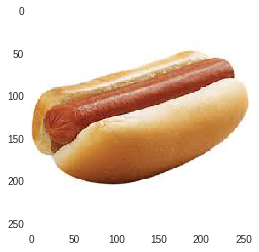

'Its a hotdog!'

In [109]:
is_hotdog(root+"test data/1/hotdog_12.jpeg")